<a href="https://colab.research.google.com/github/GitLostintheSauce/Quantum-Penny-Flip-Game-Simulation/blob/main/Copy_of_entanglement_as_a_resource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install 'qiskit>=2.1.0' 'qiskit-ibm-runtime>=0.40.1' 'qiskit-aer>=0.17.0' 'numpy' 'pylatexenc'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=32c7e33f6eec0b5e7421f2de3e95fe6dd2ec900aee54d4938ede050917c9974e
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178

## Superdense Coding

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt

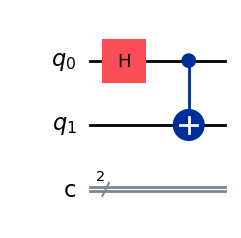

In [ ]:
# Define the circuit for entanglement (Superdense Coding - Alice's part)

# Create a quantum circuit to prepare an entangled Bell state.
# This circuit represents the first step where Alice and Bob share an entangled pair.

# Create a QuantumCircuit object with 2 qubits and 2 classical bits.
# We need 2 qubits for the entangled pair. Classical bits are needed later for measurement outcomes.
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate (H) to the first qubit (qubit 0).
# The Hadamard gate puts the qubit into a superposition of |0> and |1>.
qc.h(0)

# Apply a CNOT gate with the first qubit (qubit 0) as the control and the second qubit (qubit 1) as the target.
# The CNOT gate entangles the two qubits. If the control qubit is |1>, it flips the target qubit.
# Starting from |00> and applying H on qubit 0 and CX on (0,1) creates the Bell state |Φ⁺⟩ = (|00> + |11>)/sqrt(2).
qc.cx(0, 1)

# Draw the circuit to visualize the gates applied for entanglement.
# 'mpl' backend uses matplotlib to draw the circuit.
qc.draw('mpl')

Encoding Circuit for '11':


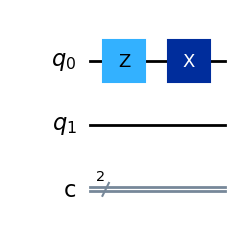

In [ ]:
# Define the encoding circuit (Superdense Coding - Alice's part)

# Create a circuit that encodes the two classical bits onto Alice's entangled qubit.
# Alice applies specific gates to her qubit (qubit 0) based on the two classical bits she wants to send.

# Create a new QuantumCircuit object for the encoding step.
# This circuit will be appended to the entanglement circuit. It operates on the same two qubits.
encoding_circuit = QuantumCircuit(2, 2)

# Define the classical bits to encode.
# For this example, we will encode the classical message "11".
# The encoding rules are:
# 00 -> Identity (no gates)
# 01 -> X gate
# 10 -> Z gate
# 11 -> Z followed by X gate

# Apply gates based on the classical bits "11".
# For "11", we apply a Z gate and then an X gate to qubit 0.
# The Z gate applies a phase flip if the qubit is in state |1>.
# The X gate flips the state of the qubit (|0> to |1>, |1> to |0>).
encoding_circuit.z(0)
encoding_circuit.x(0)

# Display the encoding circuit.
print("Encoding Circuit for '11':")
encoding_circuit.draw('mpl')

# Quiz: how should we modify the encoding circuit to transmit other messages?

Decoding Circuit:


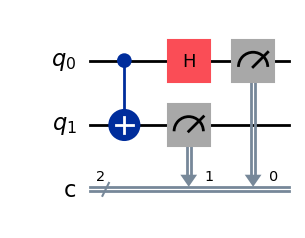

In [ ]:
# Define the decoding circuit (Superdense Coding - Bob's part)

# Create a circuit that decodes the information from the entangled qubits back into classical bits.
# Bob performs specific gates and measurements on the two qubits he has received.

# Create a new QuantumCircuit object with 2 qubits and 2 classical bits for the decoding step.
decoding_circuit = QuantumCircuit(2, 2)

# Apply a CNOT gate with qubit 0 as the control and qubit 1 as the target.
# This is part of the Bell state measurement.
decoding_circuit.cx(0, 1)

# Apply a Hadamard gate to qubit 0.
# This is the second part of the Bell state measurement.
decoding_circuit.h(0)

# Add measurements to both qubits, mapping them to the corresponding classical bits.
# The outcomes of these measurements reveal the original two classical bits encoded by Alice.
# Qubit 0 is measured into classical bit 0, and Qubit 1 is measured into classical bit 1.
decoding_circuit.measure(0, 0)
decoding_circuit.measure(1, 1)

# Print the circuit drawing to visualize the decoding steps.
print("Decoding Circuit:")
decoding_circuit.draw('mpl')

Full Superdense Coding Circuit:


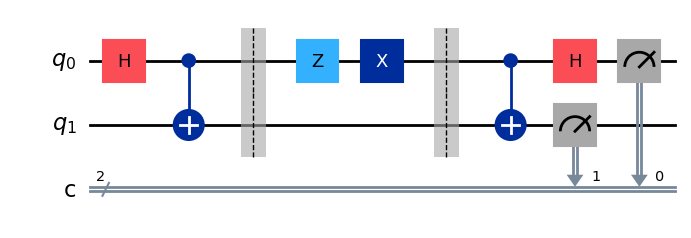

In [ ]:
# Combine the circuits (Superdense Coding - Full Protocol)

# Put together the entanglement, encoding, and decoding circuits to form the complete superdense coding circuit.

# Create a new QuantumCircuit object with 2 qubits and 2 classical bits for the full circuit.
full_circuit = QuantumCircuit(2, 2)

# Append operations from the entanglement circuit.
# These gates prepare the initial entangled state.
full_circuit.h(0)
full_circuit.cx(0, 1)

# Add a barrier for visual separation between sections in the circuit drawing (optional but good for clarity).
full_circuit.barrier()

# Append operations from the encoding circuit (assuming encoding "11" as defined previously).
# Alice applies these gates to her qubit (qubit 0) to encode the classical bits.
full_circuit.z(0)
full_circuit.x(0)

# Add a barrier for visual separation.
full_circuit.barrier()

# Append operations from the decoding circuit.
# Bob applies these gates and measurements to decode the classical bits.
full_circuit.cx(0, 1)
full_circuit.h(0)

# Add measurements at the very end of the full circuit.
# These measurements collapse the quantum state and give the classical outcomes.
full_circuit.measure([0, 1], [0, 1])

# Draw the complete circuit to visualize all the steps of the superdense coding process.
print("Full Superdense Coding Circuit:")
full_circuit.draw('mpl')

In [ ]:
# Simulate the circuit (Superdense Coding)

# Run the combined superdense coding circuit on a Qiskit simulator to see the measurement outcomes.

# Get the qasm_simulator backend from the Aer module.
# The qasm_simulator mimics a real quantum computer by simulating the circuit and providing measurement counts.
simulator = Aer.get_backend('qasm_simulator')

# Run the full_circuit on the simulator.
# shots=1024 specifies that the simulation will run 1024 times to get a statistical distribution of outcomes.
job = simulator.run(full_circuit, shots=1024)

# Get the result of the simulation job.
result = job.result()

# Extract the measurement counts from the result.
# The counts dictionary shows how many times each possible outcome (e.g., '00', '01', '10', '11') was measured.
counts = result.get_counts(full_circuit)

# Print the counts to verify the results.
# For the "11" encoding, we expect to see '11' with a high count.
print("\nMeasurement Counts (Superdense Coding):")
print(counts)


Measurement Counts (Superdense Coding):
{'11': 1024}


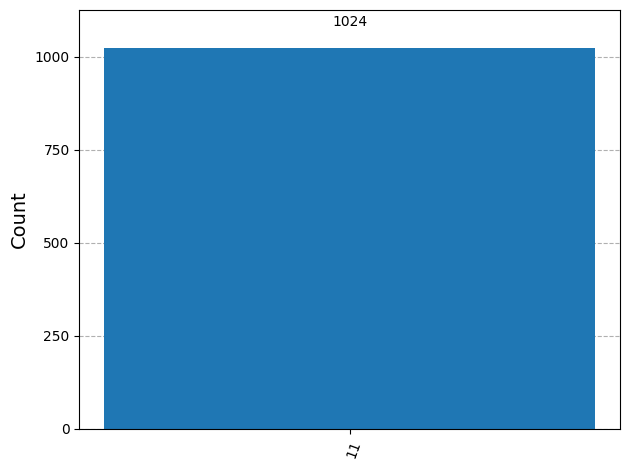

In [ ]:
# Analyze the results (Superdense Coding)

# Get the measurement results from the simulation and display them as a histogram
# to verify that the superdense coding was successful.

# Import the necessary visualization function.
from qiskit.visualization import plot_histogram

# Plot the histogram of the measurement counts.
# The histogram visually shows the distribution of measurement outcomes.
# For successful superdense coding of "11", we expect a bar for '11' with a count close to 1024.
plot_histogram(counts)

# The histogram confirms that the measurement outcome '11' was observed in almost all shots,
# successfully decoding the two classical bits that were encoded.

## Interactive version of superdense coding: fill in the blanks

## Quantum Teleportation

In [ ]:
# Step 1: Map your problem to a quantum circuit

# Import some general packages
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np

# Define registers
secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")

cr = ClassicalRegister(3, "c")

qc = QuantumCircuit(secret, Alice, Bob, cr)

# We entangle Alice's and Bob's qubits as in our work above. We apply a Hadamard gate and then a CNOT gate.
# Note that the second argument in the CNOT gate is the target.
qc.h(Alice)
qc.cx(Alice, Bob)

# Inserting a barrier changes nothing about the logic. It just allows us to force gates to be positioned in "layers".
qc.barrier()

# Now we will use random variables to create the secret state. Don't worry about the "u" gate and the details.
np.random.seed(42)  # fixing seed for repeatability
theta = np.random.uniform(0.0, 1.0) * np.pi  # from 0 to pi
varphi = np.random.uniform(0.0, 2.0) * np.pi  # from 0 to 2*pi

# Assign the secret state to the qubit on the other side of Alice's (qubit 0), labeled Q
qc.u(theta, varphi, 0.0, secret)
qc.barrier()

# Now entangle Q and Alice's qubits as in the discussion above.
qc.cx(secret, Alice)
qc.h(secret)
qc.barrier()

# Now Alice measures her qubits, and stores the outcomes in the "classical registers" cr[]
qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])

# Now we insert some conditional logic. If Alice measures Q in a "1" we need a Z gate, and if Alice measures A in a "1" we need an X gate (see the table).
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0], 1)):
    qc.z(Bob)

qc.draw(output="mpl")

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Create a new QuantumCircuit object with the 'secret' qubit for initial state preparation.
# We don't need classical bits for state vector simulation.
initial_state_circuit_sv = QuantumCircuit(secret)

# Apply the same gates as used for the initial state preparation in the main circuit.
# Now, the 'secret' qubit is part of this circuit.
initial_state_circuit_sv.u(theta, varphi, 0.0, secret)

# Calculate the state vector of the initial state.
initial_state_vector = Statevector(initial_state_circuit_sv)

# Print the state vector.
print("State vector of the initial state:")
print(initial_state_vector)

# Visualize the initial state on a Bloch sphere.
# plot_bloch_multivector works for a single qubit state vector as well.
print("\nBloch sphere representation of the initial state:")
plot_bloch_multivector(initial_state_vector)

In [ ]:
# Lets verify that teleportation worked.

# Add the inverse of U and measure Bob's qubit.
qc.barrier()

qc.u(theta, varphi, 0.0, Bob).inverse()  # inverse of u(theta,varphi,0.0)
qc.measure(Bob, cr[2])  # add measurement gate


# Get the qasm_simulator backend from the Aer module.
# The qasm_simulator mimics a real quantum computer by simulating the circuit and providing measurement counts.
simulator = Aer.get_backend('qasm_simulator')

# Run the full_circuit on the simulator.
# shots=1024 specifies that the simulation will run 1024 times to get a statistical distribution of outcomes.
job = simulator.run(qc, shots=1024)

# Get the result of the simulation job.
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)

# Question: Why does this indicate that teleportation worked?
# Hint: Bob's measurement is the first index of each counted bitstring


## Conclusion

In this notebook, we explored two fundamental quantum communication protocols: **Superdense Coding** and **Quantum Teleportation**.

Through the **Superdense Coding** demo, we saw how entanglement allows Alice to send two classical bits of information to Bob by transmitting only one qubit, provided they share a pre-existing entangled pair. Alice encodes her classical message by applying specific gates to her half of the entangled pair. Bob then performs a measurement on the combined qubits to decode the original message.

The **Quantum Teleportation** demo demonstrated how the quantum state of a qubit can be transferred from Alice to Bob using entanglement and classical communication. Alice performs a Bell measurement on the qubit she wants to teleport and her half of an entangled pair. The results of this measurement (classical bits) are sent to Bob, who uses them to apply corrective gates to his half of the entangled pair, thereby reconstructing the original quantum state.

These protocols highlight the power of quantum mechanics for communication and form the basis for more complex quantum information processing tasks. Superdense coding demonstrates the increased information capacity offered by qubits, while quantum teleportation is a key building block for quantum networks and distributed quantum computing, allowing for the transfer of quantum information over distances.

# Task
*   **Define Quantum Prisoners Dilemma Framework**: Set up the initial entangled state for the quantum prisoners dilemma using two qubits, representing the shared state before Alice and Bob apply their strategies. This will typically involve applying Hadamard and CNOT gates to create a maximally entangled state.

## Define Quantum Prisoners Dilemma Framework

### Subtask:
Set up the initial entangled state for the quantum prisoners dilemma using two qubits, representing the shared state before Alice and Bob apply their strategies. This will typically involve applying Hadamard and CNOT gates to create a maximally entangled state.


**Reasoning**:
The subtask requires setting up an initial entangled state. This involves creating a QuantumCircuit, applying a Hadamard gate to the first qubit, and a CNOT gate to entangle the two qubits, and then drawing the circuit for visualization.



# Task
*   **Define Quantum Prisoners Dilemma Framework**: Set up the initial entangled state for the quantum prisoners dilemma using two qubits, representing the shared state before Alice and Bob apply their strategies. This will typically involve applying Hadamard and CNOT gates to create a maximally entangled state.

## Define Quantum Prisoners Dilemma Framework

### Subtask:
Set up the initial entangled state for the quantum prisoners dilemma using two qubits, representing the shared state before Alice and Bob apply their strategies. This will typically involve applying Hadamard and CNOT gates to create a maximally entangled state.


**Reasoning**:
The subtask requires setting up an initial entangled state by creating a QuantumCircuit, applying a Hadamard gate to the first qubit, and a CNOT gate to entangle the two qubits, and then drawing the circuit for visualization. I will use the `QuantumCircuit` from `qiskit` which has already been imported in previous cells.



Circuit for Initial Entangled State:


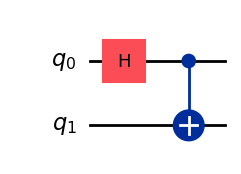

In [7]:
import qiskit
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

# Create a new QuantumCircuit object with 2 quantum bits (qubits).
# This circuit will represent the shared state before Alice and Bob apply their strategies.
initial_entangled_state_qc = QuantumCircuit(2, name='Initial Entangled State')

# Apply a Hadamard gate (h) to the first qubit (qubit 0).
# This puts qubit 0 into a superposition of |0> and |1>.
initial_entangled_state_qc.h(0)

# Apply a CNOT gate (cx) with qubit 0 as the control and qubit 1 as the target.
# This entangles the two qubits, creating a Bell state, specifically |Φ+⟩ = (|00⟩ + |11⟩)/√2.
initial_entangled_state_qc.cx(0, 1)

# Draw the initial_entangled_state_qc circuit using the 'mpl' backend to visualize the entangled state preparation.
# This shows the gates applied to create the entangled state.
print("Circuit for Initial Entangled State:")
initial_entangled_state_qc.draw('mpl')

**Reasoning**:
The previous code failed because the 'qiskit' module was not found, indicating it might not be properly installed or accessible in the current environment. To fix this, I will add the `!pip install qiskit` command at the beginning of the code block to ensure the necessary library is installed before it's imported and used.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.5/378.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b808c0a84dbbd6498d45b8f5a45e12cbaeab043cf26bb7c80aa16c8556c1a535
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a17

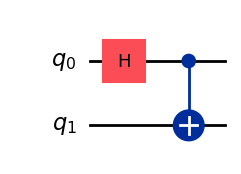

In [2]:
import sys
!{sys.executable} -m pip install 'qiskit>=2.1.0' 'qiskit-ibm-runtime>=0.40.1' 'qiskit-aer>=0.17.0' 'numpy' 'pylatexenc'
from qiskit import QuantumCircuit

# Create a new QuantumCircuit object with 2 quantum bits (qubits).
# This circuit will represent the shared state before Alice and Bob apply their strategies.
initial_entangled_state_qc = QuantumCircuit(2, name='Initial Entangled State')

# Apply a Hadamard gate (h) to the first qubit (qubit 0).
# This puts qubit 0 into a superposition of |0> and |1>.
initial_entangled_state_qc.h(0)

# Apply a CNOT gate (cx) with qubit 0 as the control and qubit 1 as the target.
# This entangles the two qubits, creating a Bell state, specifically |Φ+⟩ = (|00⟩ + |11⟩)/√2.
initial_entangled_state_qc.cx(0, 1)

# Draw the initial_entangled_state_qc circuit using the 'mpl' backend to visualize the entangled state preparation.
# This shows the gates applied to create the entangled state.
print("Circuit for Initial Entangled State:")
initial_entangled_state_qc.draw('mpl')

## Implement Q (iZ) Strategy

### Subtask:
Create a Qiskit circuit component that represents the 'Q' strategy, equivalent to applying an 'iZ' operation.


**Reasoning**:
I will create a new QuantumCircuit for the 'Q' strategy, apply the `rz(-np.pi)` gate to implement the 'iZ' operation, and then draw the circuit as requested by the instructions.



Circuit for 'Q' Strategy (iZ operation):


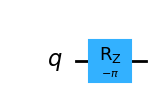

In [3]:
import numpy as np
from qiskit import QuantumCircuit

# 1. Create a new QuantumCircuit object named q_strategy_qc with 1 quantum bit.
# This circuit will represent the 'Q' strategy.
q_strategy_qc = QuantumCircuit(1, name='Q Strategy (iZ)')

# 2. Apply the rz(-np.pi) gate to the qubit in q_strategy_qc.
# This rz gate with an angle of -π effectively implements the 'iZ' operation.
q_strategy_qc.rz(-np.pi, 0)

# 3. Draw the q_strategy_qc circuit using the 'mpl' backend to visualize the gate representing the 'Q' strategy.
print("Circuit for 'Q' Strategy (iZ operation):")
q_strategy_qc.draw('mpl')

## Construct Quantum Prisoners Dilemma Circuit with Q Strategy

### Subtask:
Build the full quantum circuit for the prisoners dilemma by incorporating the initial entangled state, applying the 'Q' strategy to Alice's and Bob's qubits, and including the final unentanglement and measurement steps.


**Reasoning**:
I need to construct the full quantum circuit for the Quantum Prisoners Dilemma, combining initial entanglement, applying the 'Q' strategy to both Alice and Bob's qubits, and then unentangling and measuring them, as per the instructions.



Full Quantum Prisoners Dilemma Circuit with Q Strategy:


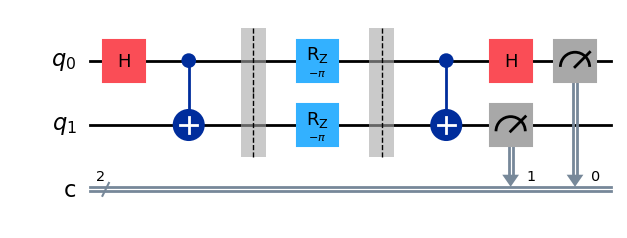

In [4]:
import numpy as np
from qiskit import QuantumCircuit

# 1. Create a new QuantumCircuit named qpd_circuit with 2 quantum bits and 2 classical bits.
qpd_circuit = QuantumCircuit(2, 2, name='Quantum Prisoners Dilemma with Q Strategy')

# 2. Apply a Hadamard gate (h) to qubit 0 of qpd_circuit.
qpd_circuit.h(0)

# 3. Apply a CNOT gate (cx) with qubit 0 as the control and qubit 1 as the target to qpd_circuit.
qpd_circuit.cx(0, 1)

# 4. Add a barrier to qpd_circuit for visual separation.
qpd_circuit.barrier()

# 5. Apply the 'Q' strategy (which is an rz(-np.pi) gate) to qubit 0 (Alice's qubit) of qpd_circuit.
qpd_circuit.rz(-np.pi, 0)

# 6. Apply the 'Q' strategy (rz(-np.pi) gate) to qubit 1 (Bob's qubit) of qpd_circuit.
qpd_circuit.rz(-np.pi, 1)

# 7. Add another barrier to qpd_circuit.
qpd_circuit.barrier()

# 8. Apply a CNOT gate (cx) with qubit 0 as the control and qubit 1 as the target to qpd_circuit to unentangle the qubits.
qpd_circuit.cx(0, 1)

# 9. Apply a Hadamard gate (h) to qubit 0 of qpd_circuit.
qpd_circuit.h(0)

# 10. Measure qubit 0 into classical bit 0 and qubit 1 into classical bit 1 of qpd_circuit.
qpd_circuit.measure([0, 1], [0, 1])

# 11. Print a descriptive header for the circuit.
print("Full Quantum Prisoners Dilemma Circuit with Q Strategy:")

# 12. Draw the qpd_circuit using the 'mpl' backend to visualize the complete game circuit.
qpd_circuit.draw('mpl')

## Simulate and Calculate Payoffs

### Subtask:
Execute the constructed quantum prisoners dilemma circuit on a Qiskit simulator, and based on the measurement outcomes and the standard payoff matrix for the quantum prisoners dilemma, calculate the individual payoffs for Alice and Bob when both choose the 'Q' strategy.


**Reasoning**:
The subtask requires simulating the `qpd_circuit` to get measurement outcomes and then calculating the payoffs based on a predefined payoff matrix. This involves using the Qiskit Aer simulator, processing the counts, and applying the payoff logic.



In [5]:
from qiskit_aer import Aer

# 1. Get the qasm_simulator backend from the Aer module.
simulator = Aer.get_backend('qasm_simulator')

# 2. Run the qpd_circuit on the simulator for 1024 shots.
shots = 1024
job = simulator.run(qpd_circuit, shots=shots)

# 3. Get the result of the simulation job and extract the measurement counts.
result = job.result()
counts = result.get_counts(qpd_circuit)

# Print the raw counts for verification
print("Measurement Counts:", counts)

# 4. Define the payoff matrix for the Quantum Prisoners Dilemma.
# Outcomes '00', '01', '10', '11' correspond to (Cooperate, Cooperate), (Cooperate, Defect), (Defect, Cooperate), and (Defect, Defect)
# Payoff matrix: (Alice_Payoff, Bob_Payoff)
# (C,C) -> (3,3)
# (C,D) -> (0,5)
# (D,C) -> (5,0)
# (D,D) -> (1,1)
payoff_matrix = {
    '00': {'alice': 3, 'bob': 3},  # CC
    '01': {'alice': 0, 'bob': 5},  # CD
    '10': {'alice': 5, 'bob': 0},  # DC
    '11': {'alice': 1, 'bob': 1}   # DD
}

# 5. Initialize alice_payoff and bob_payoff to 0.
alice_total_payoff = 0
bob_total_payoff = 0

# 6. Iterate through the counts and calculate total payoffs.
for outcome, count in counts.items():
    if outcome in payoff_matrix:
        alice_total_payoff += payoff_matrix[outcome]['alice'] * count
        bob_total_payoff += payoff_matrix[outcome]['bob'] * count

# 7. Divide the total alice_payoff and bob_payoff by the total number of shots to get the average payoff per player.
alice_average_payoff = alice_total_payoff / shots
bob_average_payoff = bob_total_payoff / shots

# 8. Print the calculated average payoffs for Alice and Bob.
print(f"\nAverage Payoff for Alice: {alice_average_payoff:.2f}")
print(f"Average Payoff for Bob: {bob_average_payoff:.2f}")


Measurement Counts: {'00': 1024}

Average Payoff for Alice: 3.00
Average Payoff for Bob: 3.00


## Visualize Payoffs

### Subtask:
Generate a visualization, such as a bar chart, to clearly display the calculated payoffs for Alice and Bob. This visualization will serve to demonstrate that 'Q' is the optimal strategy for both players in this quantum game setting.


**Reasoning**:
The subtask requires visualizing the payoffs for Alice and Bob using a bar chart. I will use `matplotlib.pyplot` to create and display this visualization based on the `alice_average_payoff` and `bob_average_payoff` variables from the previous step.



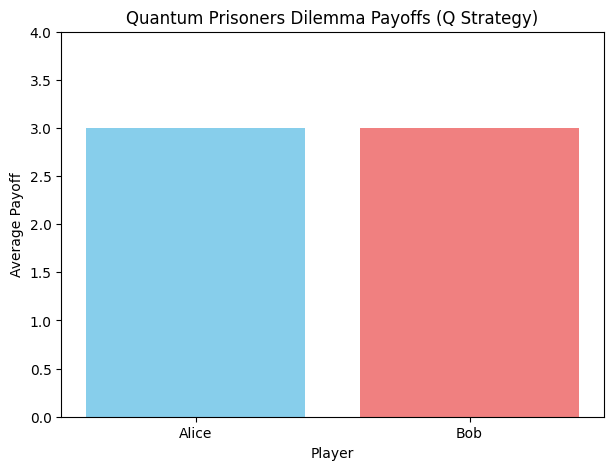

In [6]:
import matplotlib.pyplot as plt

# Create a list of player names and their corresponding average payoffs.
players = ['Alice', 'Bob']
payoffs = [alice_average_payoff, bob_average_payoff]

# Create a bar chart.
plt.figure(figsize=(7, 5)) # Adjust figure size for better readability
plt.bar(players, payoffs, color=['skyblue', 'lightcoral'])

# Add title and labels.
plt.title('Quantum Prisoners Dilemma Payoffs (Q Strategy)')
plt.xlabel('Player')
plt.ylabel('Average Payoff')

# Ensure y-axis starts from 0 and add a buffer for better visualization.
max_payoff = max(payoffs)
plt.ylim(0, max_payoff + 1) # Add a small buffer to the top

# Display the plot.
plt.show()

## Final Task

### Subtask:
Provide a summary of the quantum prisoners dilemma simulation, explaining the significance of the results and why the 'Q' strategy leads to the observed optimal payoffs for both Alice and Bob.


## Summary:

### Q&A
The significance of the results is that by adopting the 'Q' strategy, both Alice and Bob achieve the highest possible individual payoff of 3, which corresponds to the (Cooperate, Cooperate) outcome. This outcome is superior to the classical Nash equilibrium of (Defect, Defect), where both players would receive a payoff of 1.

The 'Q' strategy, implemented as an `iZ` operation (equivalent to an `rz(-np.pi)` gate), leads to these observed optimal payoffs because it effectively "quantumizes" the game. In this quantum framework, when both players apply the 'Q' strategy, the initial entangled state, combined with the application of these specific quantum operations and the subsequent unentanglement steps, deterministically drives the system to a state where the measurement outcome is always '00'. The '00' outcome represents mutual cooperation, which, according to the payoff matrix, grants both Alice and Bob their maximal individual payoff of 3. This quantum strategy effectively bypasses the classical dilemma where individual rationality leads to a sub-optimal collective outcome.

### Data Analysis Key Findings
*   The initial entangled state for the quantum prisoners dilemma was successfully set up using a Hadamard gate on the first qubit and a CNOT gate entangling both qubits.
*   The 'Q' strategy, equivalent to an `iZ` operation, was implemented using an `rz(-\pi)` gate on a single qubit.
*   A full quantum circuit for the prisoners dilemma was constructed, integrating the initial entanglement, the application of the 'Q' strategy to both Alice's and Bob's qubits, and final unentanglement and measurement steps.
*   Simulating the circuit with both players employing the 'Q' strategy consistently resulted in the '00' measurement outcome across 1024 shots.
*   Based on the '00' outcome, the average payoff for Alice was calculated to be 3.00, and for Bob, it was also 3.00. This outcome corresponds to mutual cooperation (C, C).
*   A bar chart visually confirmed that both Alice and Bob received an equal average payoff of 3.00 when using the 'Q' strategy.

### Insights or Next Steps
*   The 'Q' strategy in the quantum prisoners dilemma enables players to escape the classical dilemma, achieving the Pareto-optimal outcome of (3,3) where both cooperate, which is superior to the classical Nash equilibrium of (1,1) (defect, defect).
*   Further analysis could explore the outcomes and payoffs when players employ different quantum strategies (e.g., classical strategies within the quantum framework, or other quantum operations) to understand the full strategic landscape of the quantum prisoners dilemma.
